## Описание данных

Данные из Google Analytics (last-click attribution model) по сайту «СберАвтоподписка».


## Описание датасета:

- `session_id` — ID визита;
- `client_id` — ID посетителя;
- `visit_date` — дата визита;
- `visit_time` — время визита;
- `visit_number` — порядковый номер визита клиента;
- `utm_source` — канал привлечения;
- `utm_medium` — тип привлечения;
- `utm_campaign` — рекламная кампания;
- `utm_keyword` — ключевое слово;
- `device_category` — тип устройства;
- `device_os` — ОС устройства;
- `device_brand` — марка устройства;
- `device_model` — модель устройства;
- `device_screen_resolution` — разрешение экрана
- `device_browser` — браузер;
- `geo_country` — страна;
- `geo_city` — город
- `session_id` — ID визита;
- `hit_date` — дата события;
- `hit_time` — время события;
- `hit_number` — порядковый номер события в рамках сессии;
- `hit_type` — тип события;
- `hit_referer` — источник события;
- `hit_page_path` — страница события;
- `event_category` — тип действия;
- `event_action` — действие;
- `event_label` — тег действия;
- `event_value` — значение результата действия;


- Формат файла — (минимум) .py-скрипт с инструкцией по локальному 
запуску или (максимум) localhost web app.
- Содержание — модель, берущая на вход строку с данными по визиту 
(согласно схеме данных) и отдающая на выход результат предсказания 
по отдельному событию в числовом формате 0|1.

## Целевое действие 
— события типа «Оставить заявку» и «Заказать звонок» 
(ga_hits.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click', 
'sub_open_dialog_click', 'sub_custom_question_submit_click', 
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 
'sub_car_request_submit_click']).

## Органический трафик
— все визиты с ga_sessions.utm_medium in ('organic', 
'referral', '(none)').

## Реклама в социальных сетях 
— все визиты с ga_sessions.utm_source in 
('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 
'gVRrcxiDQubJiljoTbGm')

# Ноутбук с моделью

## Импортируем необходимые пакеты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

## Считываем данные в dataframe

In [2]:
df = pd.read_csv('data/ga_sessions.csv', low_memory=False) #загружаем первый датафрейм
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [3]:
df.shape

(1860042, 18)

In [4]:
df1=pd.read_csv("data/ga_hits.csv", usecols = ["session_id", "event_action"], low_memory=False) #загружаем второй датафрейм
df1.head()

,session_id,event_action
0,5639623078712724064.1640254056.1640254056,quiz_show
1,7750352294969115059.1640271109.1640271109,quiz_show
2,885342191847998240.1640235807.1640235807,quiz_show
3,142526202120934167.1640211014.1640211014,quiz_show
4,3450086108837475701.1640265078.1640265078,quiz_show


In [5]:
df1.shape

(15726470, 2)

In [6]:
df1["session_id"].nunique()


1734610

## Создадим столбец goal_action - это обработанное целевое действие

In [7]:
actions = ['sub_car_claim_click', 'sub_car_claim_submit_click', 
'sub_open_dialog_click', 'sub_custom_question_submit_click', 
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 
'sub_car_request_submit_click']

In [8]:
def goal_action(x):
    if x in actions:
        x = 1
        return x
    else:
        x = 0
        return x

# Добавляем фичу "goal_action" это обработанное целевое действие
df1.loc[:, 'goal_action'] = df1['event_action'].apply(goal_action)

In [9]:
df1["goal_action"].nunique()

2

In [10]:
df1 = df1.drop(columns=["event_action"])

In [11]:
df1 = df1.groupby("session_id")["goal_action"].max()

In [12]:
df1 = pd.DataFrame(df1)
df1

,goal_action
session_id,
1000009318903347362.1632663668.1632663668,0
1000010177899156286.1635013443.1635013443,0
1000013386240115915.1635402956.1635402956,0
1000017303238376207.1623489300.1623489300,0
1000020580299877109.1624943350.1624943350,0
...,...
999960188766601545.1626816843.1626816843,0
99996598443387715.1626811203.1626811203,0
999966717128502952.1638428330.1638428330,0


## объединяем датафреймы

In [13]:
df = df.merge(df1, how="inner", on="session_id") #объединяем датафреймы

In [14]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [15]:
 df[df["goal_action"]==1]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
69,9055768928391199041.1623652678.1623652678,2108460508.1623652673,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,NaN,360x780,Chrome,Russia,Moscow,1
73,9055789093275396095.1636395007.1636395007,2108465203.1636395007,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,414x736,Safari,Russia,Samara,1
76,9055794766915104430.1624305327.1624305327,2108466524.1624305326,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,desktop,NaN,NaN,NaN,834x1112,Safari,Russia,Domodedovo,1
127,9056028189803556573.1630154471.1630154471,2108520872.1630154461,2021-08-28,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,YaBrowser,Russia,Krasnodar,1
135,9056093322981390023.1628944098.1628944098,2108536037.1628944071,2021-08-14,15:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x740,Chrome,Russia,Moscow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732152,9054912872702758664.1636781836.1636781836,2108261192.1636781832,2021-11-13,08:37:16,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,HKFjmDlYppkKqsWPogJt,mobile,Android,Xiaomi,NaN,360x800,Chrome,Russia,Moscow,1
1732225,9055248417020050011.1634073188.1634073188,2108339317.1634073179,2021-10-13,00:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,NaN,360x780,Chrome,Russia,Nizhny Novgorod,1
1732227,9055248417020050011.1634075541.1634075541,2108339317.1634073179,2021-10-13,00:00:00,3,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,NaN,360x780,Chrome,Russia,Nizhny Novgorod,1
1732254,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1920x1080,Chrome,Russia,Khimki,1


# EXPLORATORY DATA ANALYSIS

In [16]:
df.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'goal_action'],
      dtype='object')

In [17]:
for column in df.columns:
    print("Количество уникальных значений столбца ", column, df[column].nunique())

Количество уникальных значений столбца  session_id 1732266
Количество уникальных значений столбца  client_id 1320704
Количество уникальных значений столбца  visit_date 226
Количество уникальных значений столбца  visit_time 85032
Количество уникальных значений столбца  visit_number 533
Количество уникальных значений столбца  utm_source 280
Количество уникальных значений столбца  utm_medium 55
Количество уникальных значений столбца  utm_campaign 406
Количество уникальных значений столбца  utm_adcontent 280
Количество уникальных значений столбца  utm_keyword 1192
Количество уникальных значений столбца  device_category 3
Количество уникальных значений столбца  device_os 13
Количество уникальных значений столбца  device_brand 200
Количество уникальных значений столбца  device_model 104
Количество уникальных значений столбца  device_screen_resolution 4947
Количество уникальных значений столбца  device_browser 55
Количество уникальных значений столбца  geo_country 159
Количество уникальных зн

In [18]:
df.shape

(1732266, 19)



### Обработка пропусков и дубликатов в данных

In [19]:
df.isna().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       76
utm_medium                        0
utm_campaign                 195287
utm_adcontent                304137
utm_keyword                 1020752
device_category                   0
device_os                   1013964
device_brand                 347196
device_model                1717204
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
goal_action                       0
dtype: int64

In [20]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1732261    False
1732262    False
1732263    False
1732264    False
1732265    False
Length: 1732266, dtype: bool

In [21]:
df = df.drop_duplicates(keep="first")

In [22]:
df["device_model"].unique()

array([nan, 'qBRdfuuhOnnqwSqNiPOv', 'AshpvdJdReafUzEMmWGr',
       'AuMdmADEIoPXiWpTsBEj', 'pcvPxfVFaAmhwFmvIeYd',
       'mzJXHtJPIOSHoHtgezIA', 'pTgAEPipQxDXCjPrJbHo',
       'IiVVIXFnNMwpBtuHILvS', 'FJApgTrMAGHoxCxQVKws',
       'tfPZFRbtlzEssBEesRwM', 'cwMJxNXiWUgMUxGiCTPs',
       'zFCiMWkbbAhTflrlLWnz', 'phrsMxwuvNvYsPYNbKkL',
       'QIRMJBHwssjlXzlheRfO', 'CwplVZElsIzdKfSTHwma',
       'auOrYtJwDXWlMwuBxhRC', 'kGgpyeEtacYWhzbuuWMR',
       'tWBQlsvNfHxRUjaPAfhd', 'HYwfQOXoovXynCsiUCVd',
       'mSVMBvlHFgftJaQAZEdp', 'kpwoWlshUwRtxMMtxukt',
       'opEZzhCrCCxqjKDmOcMK', 'FMeAKypVmqdjUhayrjne',
       'lOMpyAuAISPFiAxjXIYM', 'kjULrCjbRVbJtOfWpmQI',
       'adBSYqsJPBFluBxhXRzx', 'jXFxTkHxuiBKWOvUtsIa',
       'BhXucgFEfQMgSWpyKikP', 'ciZAODXEPQGDKvuEabGr',
       'bwQQjmDtGgrbnrREsYSG', 'JAIKWwxRffFOXQcfGTVi',
       'XoFyyEyrxZQbFrIVBGJU', 'oLPSmNOyoeTqtTUhnNIq',
       'wsPZygnUifLMgkSEnWLj', 'wOpkmMMUmanXnzWXmcFq',
       'DzXtLnggNbQSyyFLKlgY', 'eZRFfVvdAEANFDdbkujh',
     

In [23]:
df["utm_keyword"].unique()

array(['puhZPIYqKXeFPaUviSjo', 'IGUCNvHlhfHpROGclCit', nan, ...,
       'aCaBoYaQJPVffhjBQnut', 'RaeBwzCLChMDgYYukNOw',
       'fcXWTQaKfxbkBkBnzLhK'], dtype=object)

In [24]:
df = df.drop(columns=["device_model", "utm_keyword"], axis=1) #удаляем эти столбцы т.к. много пропущенных значений

In [25]:
# Сохраним в переменную numerical имена всех числовых признаков нашего датасета
numerical = df.select_dtypes(include=['int64', 'float64']).columns

# Сохраним в переменную categorical имена всех категориальных признаков нашего датасета
categorical = df.select_dtypes(include=['object']).columns

# В категориальных фичах заменяем пропуски модой
for feat in categorical:
    df[feat].fillna(df[feat].mode()[0], inplace=True)
    
# В численных фичах заменяем пропуски медианой
for feat in numerical:
    df[feat].fillna(df[feat].median(), inplace=True)

# Убедимся, что пропущенных значений больше нет
df.isnull().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
goal_action                 0
dtype: int64

In [26]:
#удалим все строки с not set
for column in df.columns:
    df = df[df[column] != "(not set)"] 

### Приведем даты к типу данных дата

In [27]:
df["visit_date"] = pd.to_datetime(df["visit_date"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642502 entries, 0 to 1732265
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   session_id                1642502 non-null  object        
 1   client_id                 1642502 non-null  object        
 2   visit_date                1642502 non-null  datetime64[ns]
 3   visit_time                1642502 non-null  object        
 4   visit_number              1642502 non-null  int64         
 5   utm_source                1642502 non-null  object        
 6   utm_medium                1642502 non-null  object        
 7   utm_campaign              1642502 non-null  object        
 8   utm_adcontent             1642502 non-null  object        
 9   device_category           1642502 non-null  object        
 10  device_os                 1642502 non-null  object        
 11  device_brand              1642502 non-null  object     

In [29]:
df.describe() #смотрим на статистики

,visit_date,visit_number,goal_action
count,1642502,1.642502e+06,1.642502e+06
mean,2021-09-25 14:44:05.221984,2.664500e+00,2.937896e-02
min,2021-05-19 00:00:00,1.000000e+00,0.000000e+00
25%,2021-07-31 00:00:00,1.000000e+00,0.000000e+00
50%,2021-10-05 00:00:00,1.000000e+00,0.000000e+00
75%,2021-11-23 00:00:00,2.000000e+00,0.000000e+00
max,2021-12-31 00:00:00,5.640000e+02,1.000000e+00
std,NaN,1.187805e+01,1.688664e-01


In [30]:
df.describe(include=object)

,session_id,client_id,visit_time,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
count,1642502,1642502,1642502,1642502,1642502,1642502,1642502,1642502,1642502,1642502,1642502,1642502,1642502,1642502
unique,1642502,1250453,84827,271,54,403,275,3,11,197,4559,48,140,2378
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,13:00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Apple,414x896,Chrome,Russia,Moscow
freq,1,449,55156,528243,501623,588371,1180846,1310697,1360360,804423,150530,895256,1600472,744885


## Смотрим на распределение целевой переменной

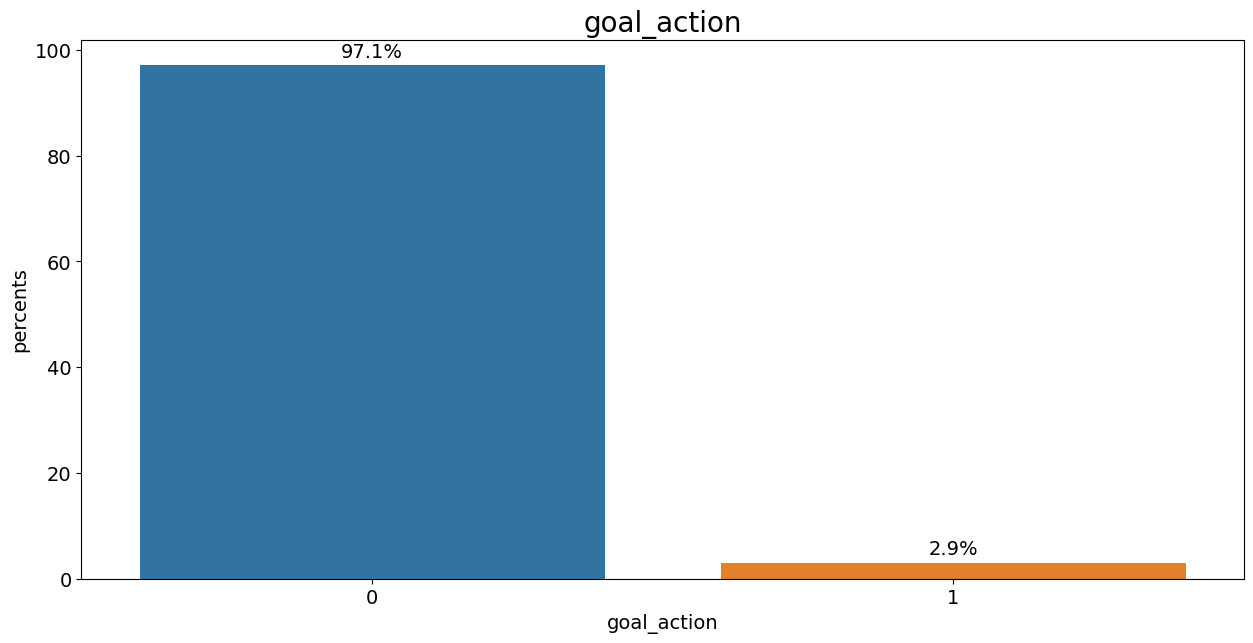

In [31]:
norm_target = (df
                ["goal_action"]
                .value_counts(normalize=True)
                .mul(100)
                .rename("percent")
                .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x="goal_action", y="percent", data=norm_target)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, #текст
                 (p.get_x() + p.get_width() / 2., p.get_height()),   #координата[e
                 ha = "center", #центрирование
                 va = "center",
                 xytext = (0, 10),
                 textcoords = "offset points", #точка смещения относительно координаты
                 fontsize=14)

plt.title("goal_action", fontsize=20)
plt.xlabel("goal_action", fontsize=14)
plt.ylabel("percents", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

### Сразу обращаем внимание что у нас очень выражен дисбаланс классов целевой переменной, что необходимо учитывать при обучении модели

## Строим графики распределения некоторых переменных, в связи с "goal_action"

Для удобства создадим переменные количество совершенных целевых действий, и нецелевых действий.

In [32]:
ga1 = len(df[df["goal_action"]==1])

In [33]:
ga0 = len(df[df["goal_action"]==0])

Посмотрим есть ли зависимость между брендом девайса и совершением целевого действия

In [34]:
device_brand = df[df["goal_action"]==1].groupby(["device_brand"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
device_brand['goal_action_1'] = device_brand["goal_action"].apply(lambda x: x/ga1*100)


In [35]:
device_brand_0 = df[df["goal_action"]==0].groupby(["device_brand"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
device_brand_0['goal_action_0'] = device_brand_0["goal_action"].apply(lambda x: x/ga0*100)
device_brand = device_brand.merge(device_brand_0, how="inner", on="device_brand")

In [36]:
device_brand.head(10)

,device_brand,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,Apple,25034,51.878562,779389,48.887594
1,Samsung,9753,20.211377,291790,18.302685
2,Xiaomi,6451,13.368563,254982,15.993883
3,Huawei,4390,9.097503,163712,10.268923
4,Realme,408,0.845508,17008,1.066836
5,OPPO,392,0.812351,12017,0.753773
6,Vivo,316,0.654854,10403,0.652534
7,Nokia,158,0.327427,6463,0.405395
8,OnePlus,151,0.312921,8833,0.554055
9,ZTE,145,0.300487,5663,0.355215


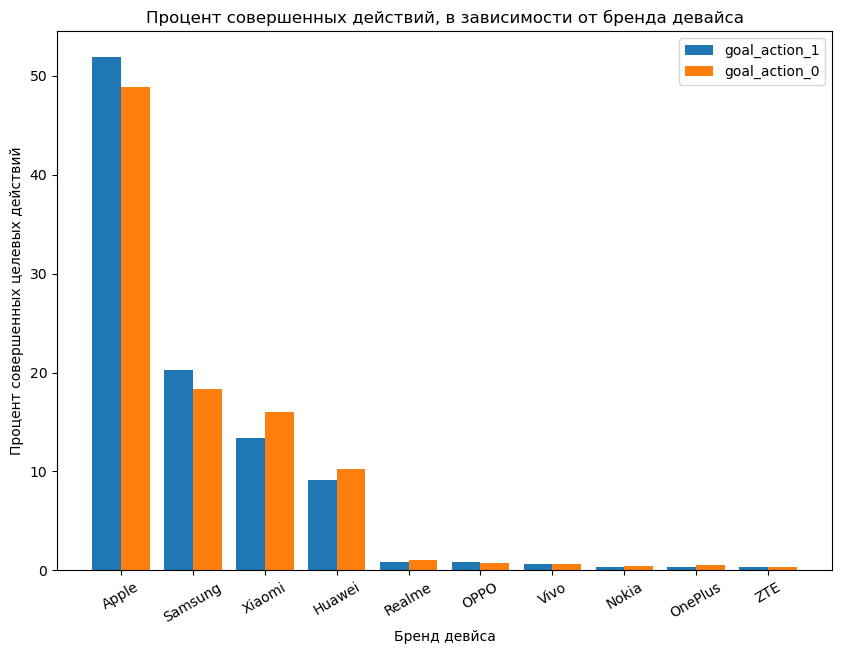

In [37]:
plt.figure(figsize=(10,7))
import numpy as np
n_ticks = np.arange(len(device_brand["device_brand"].iloc[:10]))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, device_brand["goal_action_1"].iloc[:10], width=w)
plt.bar(n_ticks + offset, device_brand["goal_action_0"].iloc[:10], width=w)
plt.title("Процент совершенных действий, в зависимости от бренда девайса")
plt.xlabel("Бренд девйса")
plt.ylabel('Процент совершенных целевых действий')
plt.legend(["goal_action_1", "goal_action_0"])
plt.xticks(n_ticks, device_brand["device_brand"].iloc[:10], rotation=30)
plt.show()

Посмотрим есть ли какая либо сезонность в наших данных

In [38]:
df["visit_month"] = df["visit_date"].dt.month.astype(object)
df["visit_day"] = df["visit_date"].dt.dayofweek.astype(object)

In [39]:
visit_month = df[df["goal_action"]==1].groupby(["visit_month"], as_index=False).agg({"goal_action":"sum"})
visit_month_0 = df[df["goal_action"]==0].groupby(["visit_month"], as_index=False).agg({"goal_action":"count"})
visit_month['goal_action_1'] = visit_month["goal_action"].apply(lambda x: x/ga1*100)
visit_month_0['goal_action_0'] = visit_month_0["goal_action"].apply(lambda x: x/ga0*100)
visit_month = visit_month.merge(visit_month_0, how="inner", on="visit_month")
visit_month

,visit_month,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,5,6162,12.769661,94241,5.911317
1,6,6361,13.182054,147548,9.255028
2,7,4718,9.777225,152237,9.549148
3,8,5255,10.890063,140899,8.837966
4,9,5791,12.000829,226036,14.178230
5,10,6798,14.087659,244905,15.361798
6,11,6166,12.777950,245708,15.412166
7,12,7004,14.514558,342673,21.494348


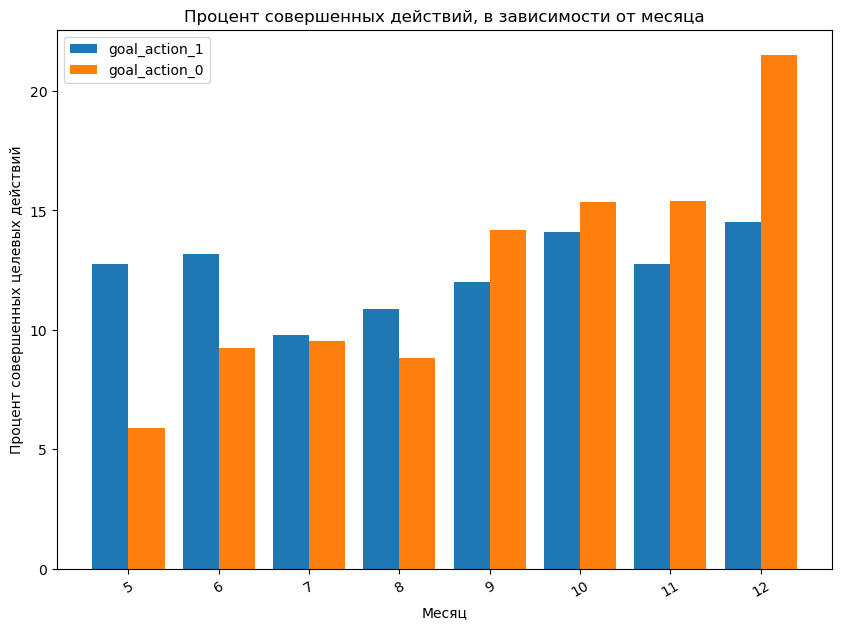

In [40]:
plt.figure(figsize=(10,7))
import numpy as np
n_ticks = np.arange(len(visit_month["visit_month"]))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, visit_month["goal_action_1"], width=w)
plt.bar(n_ticks + offset, visit_month["goal_action_0"], width=w)
plt.title("Процент совершенных действий, в зависимости от месяца")
plt.xlabel("Месяц")
plt.ylabel('Процент совершенных целевых действий')
plt.legend(["goal_action_1", "goal_action_0"])
plt.xticks(n_ticks, visit_month["visit_month"], rotation=30)
plt.show()


Посмотрим есть ли различия по странам и городам

In [41]:
country = df[df["goal_action"]==1].groupby(["geo_country"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
country_0 = df[df["goal_action"]==0].groupby(["geo_country"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
country['goal_action_1'] = country["goal_action"].apply(lambda x: x/ga1*100)
country_0['goal_action_0'] = country_0["goal_action"].apply(lambda x: x/ga0*100)
country = country.merge(country_0, how="inner", on="geo_country")
country

,geo_country,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,Russia,47331,98.085173,1553141,97.421604
1,Ukraine,188,0.389597,8000,0.501804
2,Germany,60,0.124339,1604,0.100612
3,Belarus,59,0.122267,3302,0.207120
4,Kazakhstan,50,0.103616,1891,0.118614
...,...,...,...,...,...
63,Iceland,1,0.002072,7,0.000439
64,Dominican Republic,1,0.002072,26,0.001631
65,Slovakia,1,0.002072,20,0.001255
66,China,1,0.002072,57,0.003575


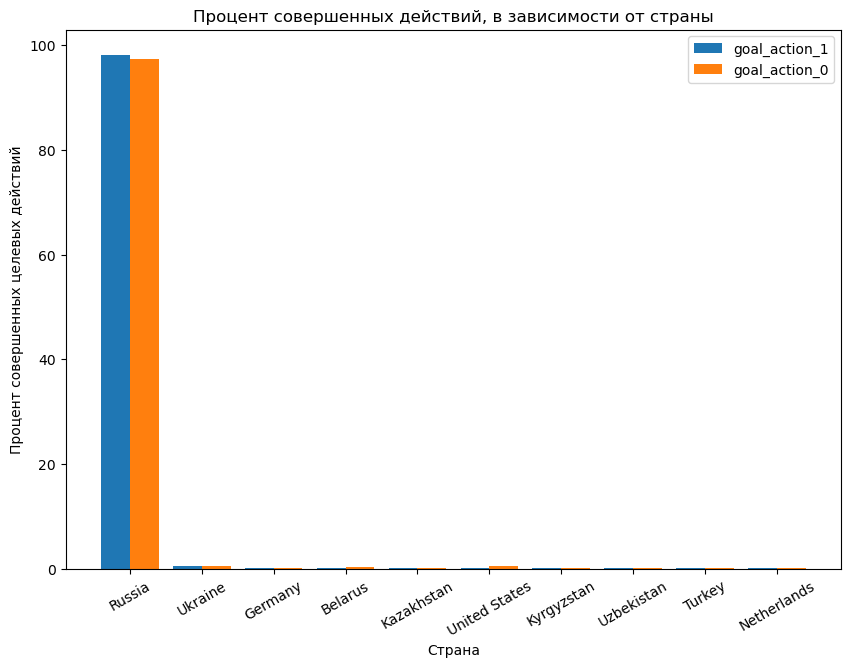

In [42]:
plt.figure(figsize=(10,7))

n_ticks = np.arange(len(country["geo_country"].iloc[:10]))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, country["goal_action_1"].iloc[:10], width=w)
plt.bar(n_ticks + offset, country["goal_action_0"].iloc[:10], width=w)

plt.title("Процент совершенных действий, в зависимости от страны")
plt.xlabel("Страна")
plt.ylabel('Процент совершенных целевых действий')
plt.legend(["goal_action_1", "goal_action_0"])
plt.xticks(n_ticks, country["geo_country"].iloc[:10], rotation=30)
plt.show()


In [43]:
city = df[df["goal_action"]==1].groupby(["geo_city"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
city_0 = df[df["goal_action"]==0].groupby(["geo_city"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
city['goal_action_1'] = city["goal_action"].apply(lambda x: x/ga1*100)
city_0['goal_action_0'] = city_0["goal_action"].apply(lambda x: x/ga0*100)
city = city.merge(city_0, how="inner", on="geo_city")
city

,geo_city,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,Moscow,23446,48.587711,721439,45.252649
1,Saint Petersburg,7031,14.570511,268384,16.834531
2,Kazan,1127,2.335509,26173,1.641715
3,Krasnodar,1068,2.213242,28847,1.809444
4,Yekaterinburg,874,1.811211,32261,2.023589
...,...,...,...,...,...
606,Goynuk,1,0.002072,71,0.004454
607,Novokuybyshevsk,1,0.002072,15,0.000941
608,Shymkent,1,0.002072,118,0.007402
609,Sibay,1,0.002072,30,0.001882


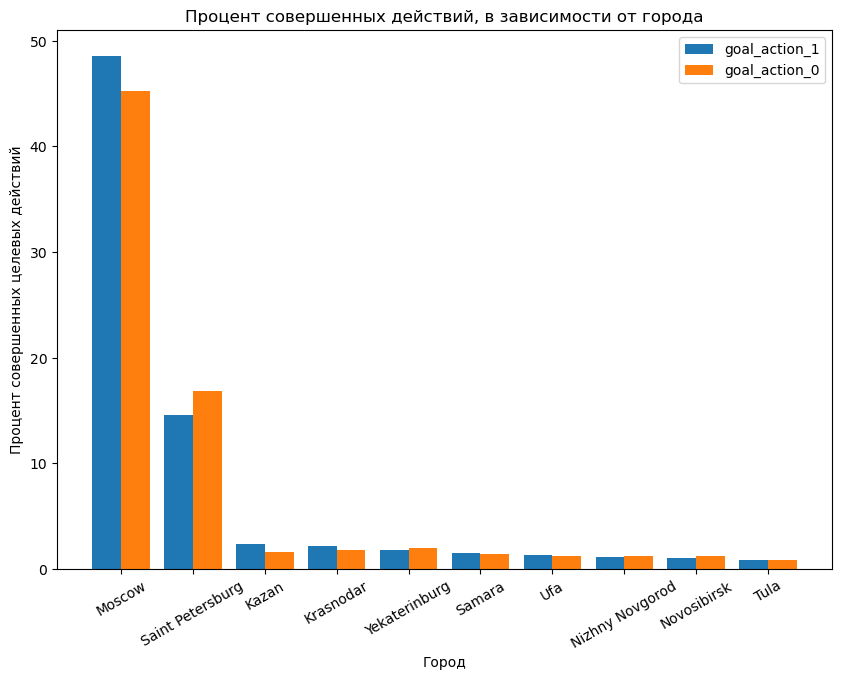

In [44]:
plt.figure(figsize=(10,7))

n_ticks = np.arange(len(city["geo_city"].iloc[:10]))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, city["goal_action_1"].iloc[:10], width=w)
plt.bar(n_ticks + offset, city["goal_action_0"].iloc[:10], width=w)

plt.title("Процент совершенных действий, в зависимости от города")
plt.xlabel("Город")
plt.ylabel('Процент совершенных целевых действий')
plt.legend(["goal_action_1", "goal_action_0"])
plt.xticks(n_ticks, city["geo_city"].iloc[:10], rotation=30)
plt.show()


Посмотрим на распределение рекламных кампаний, каналов привлечения.

In [45]:
campaign = df[df["goal_action"]==1].groupby(["utm_campaign"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
campaign_0 = df[df["goal_action"]==0].groupby(["utm_campaign"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
campaign['goal_action_1'] = campaign["goal_action"].apply(lambda x: x/ga1*100)
campaign_0['goal_action_0'] = campaign["goal_action"].apply(lambda x: x/ga0*100)
campaign = campaign.merge(campaign_0, how="inner", on="utm_campaign")

In [46]:
campaign.head(10)

,utm_campaign,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,LTuZkdKfxRGVceoWkVyg,25097,52.009118,563274,0.000063
1,LEoPHuyFvzoNfnzGgfcd,8971,18.590820,297685,0.002697
2,gecBYcKZCPMcVYdSSzKP,4334,8.981453,122820,NaN
3,FTjNLDyTrXaWYgZymFkV,2334,4.836804,214872,0.000439
4,sbJRYgVfvcnqKJNDDYIr,563,1.166718,18751,NaN
5,XHNUiSKKGTEpSAlaVMFQ,392,0.812351,22494,0.035314
6,SgIUDYUKnyWHVowUOqid,356,0.737747,14746,0.000376
7,LwJZxKuWmvOhPsaCeRjG,275,0.569889,15246,0.000125
8,zxoiLxhuSIFrCeTLQVWZ,256,0.530515,11375,NaN
9,eimRuUrNhZLAYcwRrNXu,250,0.518081,7249,NaN


In [47]:
df["utm_medium"].unique()

array(['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm',
       'stories', 'blogger_channel', 'blogger_stories', 'email', 'app',
       'push', 'partner', 'tg', 'cpv', 'cpa', 'post', 'smartbanner',
       'info_text', 'outlook', 'clicks', 'landing', 'blogger_header',
       'qr', 'google_cpc', 'sms', 'article', 'vk_smm', 'static', 'cbaafe',
       'Sbol_catalog', 'fb_smm', 'landing_interests', 'yandex_cpc',
       'web_polka', 'linktest', 'sber_app', 'CPM', 'medium', 'tablet',
       'promo_sbol', 'reach', 'dom_click', 'nkp', 'social', 'catalogue',
       'main_polka', 'last', 'link', 'ok_smm', 'users_msk', 'qrcodevideo',
       'promo_sber'], dtype=object)

In [48]:
med = df[df["goal_action"]==1].groupby(["utm_medium"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
med_0 = df[df["goal_action"]==0].groupby(["utm_medium"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
med['goal_action_1'] = med["goal_action"].apply(lambda x: x/ga1*100)
med_0['goal_action_0'] = med_0["goal_action"].apply(lambda x: x/ga0*100)
med = med.merge(med_0, how="inner", on="utm_medium")
med

,utm_medium,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,banner,14463,29.972024,487160,30.557373
1,(none),10102,20.934618,255262,16.011446
2,cpc,9204,19.073671,367486,23.050757
3,referral,7832,16.230442,121486,7.620275
4,cpm,2406,4.986012,209818,13.160947
5,organic,2001,4.146721,50530,3.169521
6,push,820,1.699306,26062,1.634753
7,email,386,0.799917,26917,1.688383
8,smartbanner,176,0.364729,6119,0.383818
9,blogger_channel,156,0.323283,7236,0.453882


In [49]:
df["utm_source"].unique()

array(['ZpYIoDJMcFzVoPFsHGJL', 'MvfHsxITijuriZxsqZqt',
       'kjsLglQLzykiRbcDiGcD', 'TxKUcPpthBDPieTGmVhx',
       'fDLlAcSmythWSCVMvqvL', 'gVRrcxiDQubJiljoTbGm',
       'SzZERoLMmrEUEhDaYcyN', 'BHcvLfOaCWvWTykYqHVe',
       'klTrhUaShgnjIbaPmqjc', 'ghoaGAksqhKomdFrxgyJ',
       'vFcAhRxLfOWKhvxjELkx', 'QxAxdyPLuQMEcrdZWdWb',
       'nSReTmyFtbSjlPrTKoaX', 'ISrKoXQCxqqYvAZICvjs',
       'hTjLvqNxGggkGnxSCaTm', 'RmEBuqrriAfAVsLQQmhk',
       'IZEXUFLARCUMynmHNBGo', 'bByPQxmDaMXgpHeypKSM',
       'jaSOmLICuBzCFqHfBdRg', 'PlbkrSYoHuZBWfYjYnfw',
       'dGlVSdmIlgWDyOPjfwwy', 'gDBGzjFKYabGgSPZvrDH',
       'NGNkCWwKgYFmiCCeZVxg', 'GpAkIXsclxDGyILfNlrR',
       'oZCzWSykfixnjMPDNjSU', 'dyicZQGoeASogoSafjEh',
       'fgymSoTvjKPEgaIJqsiH', 'aXQzDWsJuGXeBXexNHjc',
       'fbFKcMumlScApQMqFIqp', 'eLzNJHzPelJpEyBwMrKo',
       'ZHCJROlbqnkXTqIuVxnm', 'iNFgfQPqHPBuvGCYtrQE',
       'nmfptFmSirEqNzAzqbXA', 'maiZOsuEAMdeoRVsYoFk',
       'HbolMJUevblAbkHClEQa', 'cAqxcRdSSFAyCPUxQHqy',
       'Dn

In [50]:
source = df[df["goal_action"]==1].groupby(["utm_source"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
source_0 = df[df["goal_action"]==0].groupby(["utm_source"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
source['goal_action_1'] = source["goal_action"].apply(lambda x: x/ga1*100)
source_0['goal_action_0'] = source_0["goal_action"].apply(lambda x: x/ga0*100)
source = source.merge(source_0, how="inner", on="utm_source")
source.head(10)

,utm_source,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,ZpYIoDJMcFzVoPFsHGJL,15340,31.789452,512903,32.172116
1,fDLlAcSmythWSCVMvqvL,10102,20.934618,255262,16.011446
2,kjsLglQLzykiRbcDiGcD,6081,12.601803,225785,14.162485
3,bByPQxmDaMXgpHeypKSM,5328,11.041343,79711,4.999915
4,BHcvLfOaCWvWTykYqHVe,3719,7.706973,99585,6.246523
5,MvfHsxITijuriZxsqZqt,2145,4.445135,165669,10.391677
6,aXQzDWsJuGXeBXexNHjc,1746,3.618278,26419,1.657146
7,QxAxdyPLuQMEcrdZWdWb,1360,2.818361,42265,2.651095
8,jaSOmLICuBzCFqHfBdRg,386,0.799917,26916,1.688321
9,oZCzWSykfixnjMPDNjSU,254,0.526370,2254,0.141383


In [51]:
adcont = df[df["goal_action"]==1].groupby(["utm_adcontent"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
adcont_0 = df[df["goal_action"]==0].groupby(["utm_adcontent"], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
adcont['goal_action_1'] = adcont["goal_action"].apply(lambda x: x/ga1*100)
adcont_0['goal_action_0'] = adcont_0["goal_action"].apply(lambda x: x/ga0*100)
adcont = adcont.merge(adcont_0, how="inner", on="utm_adcontent")
adcont.head(10)

,utm_adcontent,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,JNHcPlZPxEMWDnRiyoBf,40999,84.963216,1139847,71.497516
1,vCIpmpaGBnIQhyYNkXqp,3731,7.731841,166692,10.455845
2,xhoenQgDQsgfEPYNPwKO,1208,2.503368,98320,6.167175
3,PkybGvWbaqORmxjNunqZ,938,1.943840,55547,3.484215
4,XSkXBCPfnJjvxbfeewtd,160,0.331572,3496,0.219288
5,SOkCdPxfUcZUzzOdgGES,148,0.306704,6284,0.394167
6,SAVVWaMghGnnvPOqMOIt,74,0.153352,2306,0.144645
7,nNqUcgFgcqQbTVSvgaHr,74,0.153352,5844,0.366568
8,LLfCasrxQzJIyuldcuWy,63,0.130556,17107,1.073046
9,sYzBROYhjSDbFZCpzGyf,63,0.130556,1182,0.074142


# FEATURE INGINEERING


Т. к. основной поток пользователей из России (Москва, Санкт-Петербург), создадим дополнительные фичи.

In [52]:
#is_russia
def is_russia(x):
    if x == "Russia":
        x = 1
        return x
    else:
        x = 0
        return x

# Добавляем фичу "is_russia"
df.loc[:, 'is_russia'] = df['geo_country'].apply(is_russia)

In [53]:
#is_sp
def is_sp(x):
    if x == "Saint Petersburg":
        x = 1
        return x
    else:
        x = 0
        return x

# Добавляем фичу "is_sp"
df.loc[:, 'is_sp'] = df['geo_city'].apply(is_sp)

In [54]:
#is_moscow
def is_moscow(x):
    if x == "Moscow":
        x = 1
        return x
    else:
        x = 0
        return x

# Добавляем фичу "is_sp"
df.loc[:, 'is_moscow'] = df['geo_city'].apply(is_moscow)

In [55]:
df[df["is_russia"] == 1]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,goal_action,visit_month,visit_day,is_russia,is_sp,is_moscow
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,0,11,2,1,0,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,385x854,Samsung Internet,Russia,Moscow,0,11,6,1,0,1
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,0,12,1,1,0,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,...,393x786,Chrome,Russia,Moscow,0,5,5,1,0,1
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,393x786,Chrome,Russia,Moscow,0,5,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,...,1920x1080,Chrome,Russia,Moscow,0,12,2,1,0,1
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,390x844,Safari,Russia,Stavropol,0,5,2,1,0,0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,375x667,Safari,Russia,Moscow,0,11,0,1,0,1
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,393x851,Chrome,Russia,Chelyabinsk,0,11,0,1,0,0


In [56]:
#is_organic_traffic - органический траффик
org = ['organic', 
'referral', '(none)']
def organic(x):
    if x in org:
        x = 1
        return x
    else:
        x = 0
        return x

# Добавляем фичу "is_organic_traffic" 
df.loc[:, 'is_organic_traffic'] = df['utm_medium'].apply(organic)


In [57]:
org = df[df["goal_action"]==1].groupby(['is_organic_traffic'], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
org_0 = df[df["goal_action"]==0].groupby(['is_organic_traffic'], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
org['goal_action_1'] = org["goal_action"].apply(lambda x: x/ga1*100)
org_0['goal_action_0'] = org_0["goal_action"].apply(lambda x: x/ga0*100)
org = org.merge(org_0, how="inner", on="is_organic_traffic")
org.head(10)

,is_organic_traffic,goal_action_x,goal_action_1,goal_action_y,goal_action_0
0,0,28320,58.688219,1166969,73.198758
1,1,19935,41.311781,427278,26.801242


In [58]:
#is_social_media - реклама в соцсетях
soc = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 
'gVRrcxiDQubJiljoTbGm']
def social(x):
    if x in soc:
        x = 1
        return x
    else:
        x = 0
        return x

# Добавляем фичу "is_social_media" 
df.loc[:, 'is_social_media'] = df['utm_source'].apply(social)


In [59]:
soc = df[df["goal_action"]==1].groupby(['is_social_media'], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
soc_0 = df[df["goal_action"]==0].groupby(['is_social_media'], as_index=False).agg({"goal_action":"count"}).sort_values(["goal_action"],ascending=False)
soc['goal_action_1'] = soc["goal_action"].apply(lambda x: x/ga1*100)
soc_0['goal_action'] = soc_0["goal_action"].apply(lambda x: x/ga0*100)
soc = soc.merge(soc_0, how="inner", on="is_social_media")
soc.head(10)

,is_social_media,goal_action_x,goal_action_1,goal_action_y
0,0,44396,92.002901,85.186925
1,1,3859,7.997099,14.813075


По результатам анализа данных целесообразно сгруппировать категориальные признаки. Группируем по принципу если частота встречаемости признака в данных менее 1% то такой признак относим к категории other, если более 1 % то оставляем сам признак.

In [60]:
device_brand = df.groupby(["device_brand"]).agg({"device_brand":"count"})
summa = len(df["device_brand"])
device_brand["device_brand"] = device_brand["device_brand"].apply(lambda x: x/summa*100)
top_brands = dict(zip(device_brand.index, device_brand["device_brand"]))
top_brands = {key:val for key, val in top_brands.items() if val > 1.0}
def brand(x):
    if x in top_brands:
        return x
    else:
        x = "other"
        return x

# Добавляем фичу "top_brand"
df.loc[:, 'top_brand'] = df['device_brand'].apply(brand)

In [61]:
utm_campaign = df.groupby(["utm_campaign"]).agg({"utm_campaign":"count"})
summa = len(df["utm_campaign"])
utm_campaign["utm_campaign"] = utm_campaign["utm_campaign"].apply(lambda x: x/summa*100)
top_campaign = dict(zip(utm_campaign.index, utm_campaign["utm_campaign"]))
top_campaign = {key:val for key, val in top_campaign.items() if val > 1.0}
def camp(x):
    if x in top_campaign:
        return x
    else:
        x = "other"
        return x

# Добавляем фичу "top_campaign"
df.loc[:, 'top_campaign'] = df['utm_campaign'].apply(camp)

In [62]:
utm_medium = df.groupby(["utm_medium"]).agg({"utm_medium":"count"})
summa = len(df["utm_medium"])
utm_medium["utm_medium"] = utm_medium["utm_medium"].apply(lambda x: x/summa*100)
top_medium = dict(zip(utm_medium.index, utm_medium["utm_medium"]))
top_medium = {key:val for key, val in top_medium.items() if val > 1.0}
def med(x):
    if x in top_medium:
        return x
    else:
        x = "other"
        return x

# Добавляем фичу "top_medium"
df.loc[:, 'top_medium'] = df['utm_medium'].apply(med)

In [63]:
utm_adcontent = df.groupby(["utm_adcontent"]).agg({"utm_adcontent":"count"})
summa = len(df["utm_adcontent"])
utm_adcontent["utm_adcontent"] = utm_adcontent["utm_adcontent"].apply(lambda x: x/summa*100)
top_adcontent = dict(zip(utm_adcontent.index, utm_adcontent["utm_adcontent"]))
top_adcontent = {key:val for key, val in top_adcontent.items() if val > 1.0}
def ad(x):
    if x in top_adcontent:
        return x
    else:
        x = "other"
        return x

# Добавляем фичу "top_adcontent"
df.loc[:, 'top_adcontent'] = df['utm_adcontent'].apply(ad)

In [64]:
utm_source = df.groupby(["utm_source"]).agg({"utm_source":"count"})
summa = len(df["utm_source"])
utm_source["utm_source"] = utm_source["utm_source"].apply(lambda x: x/summa*100)
top_source = dict(zip(utm_source.index, utm_source["utm_source"]))
top_source = {key:val for key, val in top_source.items() if val > 1.0}
def source(x):
    if x in top_source:
        return x
    else:
        x = "other"
        return x

# Добавляем фичу "top_source"
df.loc[:, 'top_source'] = df['utm_source'].apply(source)

In [65]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,is_russia,is_sp,is_moscow,is_organic_traffic,is_social_media,top_brand,top_campaign,top_medium,top_adcontent,top_source
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,1,0,0,0,0,Huawei,LEoPHuyFvzoNfnzGgfcd,banner,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,1,0,1,0,1,Samsung,FTjNLDyTrXaWYgZymFkV,cpm,xhoenQgDQsgfEPYNPwKO,MvfHsxITijuriZxsqZqt
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,1,0,0,0,0,Huawei,LEoPHuyFvzoNfnzGgfcd,banner,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,...,1,0,1,0,0,Xiaomi,LTuZkdKfxRGVceoWkVyg,cpc,other,kjsLglQLzykiRbcDiGcD
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,1,0,1,0,0,Xiaomi,LTuZkdKfxRGVceoWkVyg,cpc,JNHcPlZPxEMWDnRiyoBf,kjsLglQLzykiRbcDiGcD


In [66]:
df["top_campaign"].nunique()

8

## Обработаем названия стран использую дополнительный датасет, содержащий значения долготы и широты.

In [67]:
coords=pd.read_csv("data/world_coordinates.csv")

In [68]:
coords

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615
...,...,...,...,...
239,YE,Yemen,15.552727,48.516388
240,YT,Mayotte,-12.827500,45.166244
241,ZA,South Africa,-30.559482,22.937506
242,ZM,Zambia,-13.133897,27.849332


In [69]:
countries = dict(zip(coords.Country, coords.latitude))
countries["Russia"]

61.52401

In [70]:
countries = dict(zip(coords.Country, coords.latitude))
def country(x):
    if x in countries:
        lat = countries[x] 
        return lat
    else:
        lat = "Nan"
        return lat

# Добавляем фичу "top_brand"
df.loc[:, 'lat'] = df['geo_country'].apply(country)

In [71]:
df = df[df["lat"] != "Nan"]

In [72]:
df["lat"].unique()

array([61.52401, 48.379433, 41.87194, 53.709807, 60.128161, -25.274398,
       48.019573, 58.595272, 40.143105, -14.235004, 42.708678, 42.733883,
       41.377491, 38.861034, 53.41291, 35.126413, 23.424076, 51.165691,
       52.132633, 51.919438, 41.20438, 20.593684, 56.879635, 38.963745,
       40.069099, -38.416097, 61.92411, 56.130366, 60.472024, 46.227638,
       48.669026, 40.463667, 42.315407, 23.885942, 47.516231, 1.352083,
       -0.789275, 56.26392, 41.153332, 46.818188, 35.86166, 47.411631,
       39.399872, 31.046051, 46.151241, 55.169438, 23.634501, 3.202778,
       26.820553, 35.907757, 39.074208, 47.162494, 1.373333, 15.870032,
       45.943161, 33.854721, 21.521757, 64.963051, 12.862807, 12.565679,
       30.375321, 33.93911, 14.058324, 46.862496, -20.348404, 32.427908,
       45.1, 6.611111, -3.373056, 33.886917, 18.735693, 25.354826,
       33.223191, 44.016521, 31.791702, 49.815273, 23.684994, 36.204824,
       8.619543, 50.503887, 6.42375, 7.873054, -30.559482, -11.2

In [73]:
countries = dict(zip(coords.Country, coords.longitude))
def country(x):
    if x in countries:
        long = countries[x] 
        return long
    else:
        long = "Nan"
        return long

# Добавляем фичу "top_brand"
df.loc[:, 'long'] = df['geo_country'].apply(country)

In [74]:
df = df[df["long"] != "Nan"]

In [75]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,is_moscow,is_organic_traffic,is_social_media,top_brand,top_campaign,top_medium,top_adcontent,top_source,lat,long
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,0,0,0,Huawei,LEoPHuyFvzoNfnzGgfcd,banner,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL,61.52401,105.318756
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,1,0,1,Samsung,FTjNLDyTrXaWYgZymFkV,cpm,xhoenQgDQsgfEPYNPwKO,MvfHsxITijuriZxsqZqt,61.52401,105.318756
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,0,0,0,Huawei,LEoPHuyFvzoNfnzGgfcd,banner,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL,61.52401,105.318756
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,...,1,0,0,Xiaomi,LTuZkdKfxRGVceoWkVyg,cpc,other,kjsLglQLzykiRbcDiGcD,61.52401,105.318756
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,1,0,0,Xiaomi,LTuZkdKfxRGVceoWkVyg,cpc,JNHcPlZPxEMWDnRiyoBf,kjsLglQLzykiRbcDiGcD,61.52401,105.318756


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634111 entries, 0 to 1732265
Data columns (total 31 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   session_id                1634111 non-null  object        
 1   client_id                 1634111 non-null  object        
 2   visit_date                1634111 non-null  datetime64[ns]
 3   visit_time                1634111 non-null  object        
 4   visit_number              1634111 non-null  int64         
 5   utm_source                1634111 non-null  object        
 6   utm_medium                1634111 non-null  object        
 7   utm_campaign              1634111 non-null  object        
 8   utm_adcontent             1634111 non-null  object        
 9   device_category           1634111 non-null  object        
 10  device_os                 1634111 non-null  object        
 11  device_brand              1634111 non-null  object     

Немного сгруппируем значения браузер.

In [77]:
def browser(x):
    x = x.split(" ")
    return x[0]
# Добавляем фичу "short_browser"
df.loc[:, 'short_browser'] = df['device_browser'].apply(browser)

In [78]:
df["short_browser"].unique()

array(['Chrome', 'Samsung', 'Safari', 'YaBrowser', 'Android', 'Opera',
       'Firefox', 'Edge', 'UC', 'Mozilla', 'Coc', 'Internet', 'Puffin',
       '[FBAN', 'MRCHROME', 'Instagram', 'Maxthon', 'Amazon', 'SeaMonkey',
       'MyApp', 'MT6735_TD', 'Nokia501', 'com.zhiliaoapp.musically',
       'Konqueror', 'Iron'], dtype=object)

Обработаем время визита, создав признак час визита

In [79]:
df['visit_time']

0          14:36:32
1          08:21:30
2          02:42:06
3          05:00:00
4          05:00:00
             ...   
1732261    10:48:25
1732262    08:00:00
1732263    15:31:55
1732264    15:36:44
1732265    19:39:02
Name: visit_time, Length: 1634111, dtype: object

In [80]:
def hour(x):
    x = x.split(":")
    return x[0]
df.loc[:, 'visit_hour'] = df["visit_time"].apply(hour)

In [81]:
df['visit_hour']

0          14
1          08
2          02
3          05
4          05
           ..
1732261    10
1732262    08
1732263    15
1732264    15
1732265    19
Name: visit_hour, Length: 1634111, dtype: object

<Axes: >

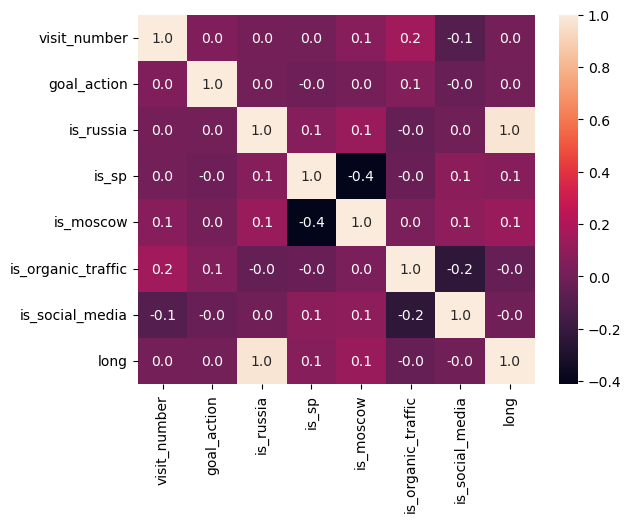

In [82]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure()
sns.heatmap(df[numerical].corr(method="spearman"), annot=True, fmt=".1f")


# Стандартизация числовых переменных о обработка категориальных

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634111 entries, 0 to 1732265
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   session_id                1634111 non-null  object        
 1   client_id                 1634111 non-null  object        
 2   visit_date                1634111 non-null  datetime64[ns]
 3   visit_time                1634111 non-null  object        
 4   visit_number              1634111 non-null  int64         
 5   utm_source                1634111 non-null  object        
 6   utm_medium                1634111 non-null  object        
 7   utm_campaign              1634111 non-null  object        
 8   utm_adcontent             1634111 non-null  object        
 9   device_category           1634111 non-null  object        
 10  device_os                 1634111 non-null  object        
 11  device_brand              1634111 non-null  object     

Приведем все признаки к нужному типу данных

In [86]:
df["visit_month"]=df["visit_month"].astype("int")          
df["visit_day"]=df["visit_day"].astype("int")              
df["visit_hour"]=df["visit_hour"].astype("int") 
df["long"] = df["long"].astype("float")
df["lat"] = df["lat"].astype("float")

In [87]:
df["goal_action"] = df["goal_action"].astype("category") #приведем цедевую переменную к типу category

Удалим ненужные столбцы

In [88]:
df=df.drop(columns=["session_id", "client_id", "device_screen_resolution", "utm_medium", "geo_country", "geo_city", "device_browser", "visit_time", "visit_date", "device_brand", "utm_medium", "utm_adcontent", "utm_campaign", "utm_source"], axis=1)

In [90]:
df.head()

,visit_number,device_category,device_os,goal_action,visit_month,visit_day,is_russia,is_sp,is_moscow,is_organic_traffic,is_social_media,top_brand,top_campaign,top_medium,top_adcontent,top_source,lat,long,short_browser,visit_hour
0,1,mobile,Android,0,11,2,1,0,0,0,0,Huawei,LEoPHuyFvzoNfnzGgfcd,banner,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL,61.52401,105.318756,Chrome,14
1,1,mobile,Android,0,11,6,1,0,1,0,1,Samsung,FTjNLDyTrXaWYgZymFkV,cpm,xhoenQgDQsgfEPYNPwKO,MvfHsxITijuriZxsqZqt,61.52401,105.318756,Samsung,8
2,1,mobile,Android,0,12,1,1,0,0,0,0,Huawei,LEoPHuyFvzoNfnzGgfcd,banner,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL,61.52401,105.318756,Chrome,2
3,1,mobile,Android,0,5,5,1,0,1,0,0,Xiaomi,LTuZkdKfxRGVceoWkVyg,cpc,other,kjsLglQLzykiRbcDiGcD,61.52401,105.318756,Chrome,5
4,2,mobile,Android,0,5,5,1,0,1,0,0,Xiaomi,LTuZkdKfxRGVceoWkVyg,cpc,JNHcPlZPxEMWDnRiyoBf,kjsLglQLzykiRbcDiGcD,61.52401,105.318756,Chrome,5


Обработаем категориальные переменные

In [91]:
#df = pd.get_dummies(df, columns=["device_category", "device_os", "device_brand", "utm_campaign", "short_browser", "utm_source", "utm_adcontent"], drop_first= True )

In [92]:
data = df[["device_category", "device_os", "top_brand", "top_campaign", "short_browser", "top_source", "top_adcontent", "top_medium"]]

In [93]:

ohe = OneHotEncoder(sparse_output=False)

In [94]:
ohe.fit(data[["device_category", "device_os", "top_brand", "top_campaign", "short_browser", "top_source", "top_adcontent", "top_medium"]])

OneHotEncoder(sparse_output=False)

In [95]:
ohe_category = ohe.transform(data[["device_category", "device_os", "top_brand", "top_campaign", "short_browser", "top_source", "top_adcontent", "top_medium"]])

In [96]:
ohe.get_feature_names_out()

array(['device_category_desktop', 'device_category_mobile',
       'device_category_tablet', 'device_os_Android',
       'device_os_BlackBerry', 'device_os_Chrome OS',
       'device_os_Firefox OS', 'device_os_Linux', 'device_os_Macintosh',
       'device_os_Nokia', 'device_os_Windows', 'device_os_Windows Phone',
       'device_os_iOS', 'top_brand_Apple', 'top_brand_Huawei',
       'top_brand_Realme', 'top_brand_Samsung', 'top_brand_Xiaomi',
       'top_brand_other', 'top_campaign_FTjNLDyTrXaWYgZymFkV',
       'top_campaign_LEoPHuyFvzoNfnzGgfcd',
       'top_campaign_LTuZkdKfxRGVceoWkVyg',
       'top_campaign_XHNUiSKKGTEpSAlaVMFQ',
       'top_campaign_gecBYcKZCPMcVYdSSzKP',
       'top_campaign_okTXSMadDkjvntEHzIjp', 'top_campaign_other',
       'top_campaign_sbJRYgVfvcnqKJNDDYIr', 'short_browser_Amazon',
       'short_browser_Android', 'short_browser_Chrome',
       'short_browser_Coc', 'short_browser_Edge', 'short_browser_Firefox',
       'short_browser_Instagram', 'short_browser_I

In [97]:
df[ohe.get_feature_names_out()] = ohe_category

In [98]:
df = df.drop(columns=["device_category", "device_os", "top_brand", "top_campaign", "short_browser", "top_source", "top_adcontent", "top_medium"], axis=1)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634111 entries, 0 to 1732265
Data columns (total 91 columns):
 #   Column                                  Non-Null Count    Dtype   
---  ------                                  --------------    -----   
 0   visit_number                            1634111 non-null  int64   
 1   goal_action                             1634111 non-null  category
 2   visit_month                             1634111 non-null  int32   
 3   visit_day                               1634111 non-null  int32   
 4   is_russia                               1634111 non-null  int64   
 5   is_sp                                   1634111 non-null  int64   
 6   is_moscow                               1634111 non-null  int64   
 7   is_organic_traffic                      1634111 non-null  int64   
 8   is_social_media                         1634111 non-null  int64   
 9   lat                                     1634111 non-null  float64 
 10  long                   

In [100]:
data = df[["visit_month", "visit_day", "visit_number", "visit_hour", "is_russia", "is_sp", "is_social_media", "is_moscow", "is_organic_traffic", "lat", "long"]]

Обработаем числовые переменные

In [101]:
std_scaler = StandardScaler()

In [102]:
std_scaler.fit(data)

StandardScaler()

In [103]:
std_scaler_data = std_scaler.transform(data)

In [104]:
 df[["visit_month", "visit_day", "visit_number", "visit_hour", "is_russia", "is_sp", "is_social_media", "is_moscow", "is_organic_traffic", "lat", "long"]]=std_scaler_data

In [105]:
df.head()

,visit_number,goal_action,visit_month,visit_day,is_russia,is_sp,is_moscow,is_organic_traffic,is_social_media,lat,...,top_adcontent_xhoenQgDQsgfEPYNPwKO,top_medium_(none),top_medium_banner,top_medium_cpc,top_medium_cpm,top_medium_email,top_medium_organic,top_medium_other,top_medium_push,top_medium_referral
0,-0.140372,0,0.772431,-0.397770,0.144976,-0.450228,-0.915247,-0.611099,-0.410613,0.114575,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.140372,0,0.772431,1.614332,0.144976,-0.450228,1.092601,-0.611099,2.435385,0.114575,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.140372,0,1.224402,-0.900796,0.144976,-0.450228,-0.915247,-0.611099,-0.410613,0.114575,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.140372,0,-1.939395,1.111306,0.144976,-0.450228,1.092601,-0.611099,-0.410613,0.114575,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.056387,0,-1.939395,1.111306,0.144976,-0.450228,1.092601,-0.611099,-0.410613,0.114575,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
columns = df.columns.to_list()
columns

['visit_number',
 'goal_action',
 'visit_month',
 'visit_day',
 'is_russia',
 'is_sp',
 'is_moscow',
 'is_organic_traffic',
 'is_social_media',
 'lat',
 'long',
 'visit_hour',
 'device_category_desktop',
 'device_category_mobile',
 'device_category_tablet',
 'device_os_Android',
 'device_os_BlackBerry',
 'device_os_Chrome OS',
 'device_os_Firefox OS',
 'device_os_Linux',
 'device_os_Macintosh',
 'device_os_Nokia',
 'device_os_Windows',
 'device_os_Windows Phone',
 'device_os_iOS',
 'top_brand_Apple',
 'top_brand_Huawei',
 'top_brand_Realme',
 'top_brand_Samsung',
 'top_brand_Xiaomi',
 'top_brand_other',
 'top_campaign_FTjNLDyTrXaWYgZymFkV',
 'top_campaign_LEoPHuyFvzoNfnzGgfcd',
 'top_campaign_LTuZkdKfxRGVceoWkVyg',
 'top_campaign_XHNUiSKKGTEpSAlaVMFQ',
 'top_campaign_gecBYcKZCPMcVYdSSzKP',
 'top_campaign_okTXSMadDkjvntEHzIjp',
 'top_campaign_other',
 'top_campaign_sbJRYgVfvcnqKJNDDYIr',
 'short_browser_Amazon',
 'short_browser_Android',
 'short_browser_Chrome',
 'short_browser_Coc',
 '

## Моделирование

In [107]:
x = df.drop(columns=["goal_action"], axis=1)
y = df["goal_action"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

In [108]:
lr = LogisticRegression(solver="liblinear", penalty='l2', random_state=42, C=1.0, class_weight='balanced')
lr.fit(x_train, y_train)
prediction_test = lr.predict_proba(x_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, prediction_test)
print(f"model: {lr},  roc_auc_score: {roc_auc_test:.4f}")
importance = lr.coef_[0]
feature_list = list(x_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importance})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results[feature_results["importance"]==0.0]

model: LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear'),  roc_auc_score: 0.6615


,feature,importance
38,short_browser_MT6735_TD,0.0
39,device_os_Windows Phone,0.0


In [114]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1, 
                            n_estimators=280, min_samples_split=10, min_samples_leaf=5, oob_score=True)
rf.fit(x_train, y_train)
prediction_test = rf.predict_proba(x_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, prediction_test)
print(f"model: {rf},  roc_auc_score: {roc_auc_test:.4f}")
importance = rf.feature_importances_[0]
feature_list = list(x_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importance})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(10)

model: RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=280, n_jobs=-1,
                       oob_score=True, random_state=42),  roc_auc_score: 0.6683


,feature,importance
0,visit_number,0.086371
1,top_source_ZpYIoDJMcFzVoPFsHGJL,0.086371
2,top_source_QxAxdyPLuQMEcrdZWdWb,0.086371
3,top_source_MvfHsxITijuriZxsqZqt,0.086371
4,top_source_BHcvLfOaCWvWTykYqHVe,0.086371
5,short_browser_com.zhiliaoapp.musically,0.086371
6,short_browser_[FBAN,0.086371
7,short_browser_YaBrowser,0.086371
8,short_browser_UC,0.086371
9,short_browser_SeaMonkey,0.086371


In [110]:
feature_results[feature_results["importance"]==0.0]

,feature,importance


In [121]:
mlp = MLPClassifier(random_state=42, max_iter=200, hidden_layer_sizes = (100,20), activation = "tanh")
mlp.fit(x_train, y_train)
prediction_test = mlp.predict_proba(x_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, prediction_test)
print(f"model: {mlp},  roc_auc_score: {roc_auc_test:.4f}")
importance = rf.feature_importances_[0]
feature_list = list(x_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importance})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(10)

model: MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 20), random_state=42),  roc_auc_score: 0.6876


,feature,importance
0,visit_number,0.086371
1,top_source_ZpYIoDJMcFzVoPFsHGJL,0.086371
2,top_source_QxAxdyPLuQMEcrdZWdWb,0.086371
3,top_source_MvfHsxITijuriZxsqZqt,0.086371
4,top_source_BHcvLfOaCWvWTykYqHVe,0.086371
5,short_browser_com.zhiliaoapp.musically,0.086371
6,short_browser_[FBAN,0.086371
7,short_browser_YaBrowser,0.086371
8,short_browser_UC,0.086371
9,short_browser_SeaMonkey,0.086371
